Import libraries

Taken from website:-
https://ourworldindata.org/coronavirus-source-data

In [13]:
import pandas as pd
import numpy as np

Read files

In [14]:
# load datasets
df = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv')
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98633,ZWE,Africa,Zimbabwe,2021-06-23,43480.0,766.0,417.714,1692.0,1.0,7.429,2925.400,51.538,28.104,113.840,0.067,0.500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5716.0,614408.0,41.338,0.385,3785.0,0.255,0.110,9.1,tests performed,1166849.0,715056.0,451793.0,20471.0,6568.0,7.85,4.81,3.04,442.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
98634,ZWE,Africa,Zimbabwe,2021-06-24,44306.0,826.0,482.714,1709.0,17.0,8.857,2980.974,55.575,32.478,114.984,1.144,0.596,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4888.0,619296.0,41.667,0.329,3978.0,0.268,0.121,8.2,tests performed,1193315.0,725582.0,467733.0,26466.0,9604.0,8.03,4.88,3.15,646.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
98635,ZWE,Africa,Zimbabwe,2021-06-25,45217.0,911.0,554.571,1721.0,12.0,9.286,3042.268,61.293,37.312,115.791,0.807,0.625,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98638 entries, 0 to 98637
Data columns (total 60 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   iso_code                               98638 non-null  object 
 1   continent                              94005 non-null  object 
 2   location                               98638 non-null  object 
 3   date                                   98638 non-null  object 
 4   total_cases                            95177 non-null  float64
 5   new_cases                              95174 non-null  float64
 6   new_cases_smoothed                     94164 non-null  float64
 7   total_deaths                           85073 non-null  float64
 8   new_deaths                             85229 non-null  float64
 9   new_deaths_smoothed                    94164 non-null  float64
 10  total_cases_per_million                94670 non-null  float64
 11  ne

Convert date to number

In [16]:
import datetime 

date = df.date

df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['date_num'] = df['date'].dt.strftime('%d%m%Y')
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality,date_num
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,24022020
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,25022020
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,26022020
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,27022020
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,28022020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98633,ZWE,Africa,Zimbabwe,2021-06-23,43480.0,766.0,417.714,1692.0,1.0,7.429,2925.400,51.538,28.104,113.840,0.067,0.500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5716.0,614408.0,41.338,0.385,3785.0,0.255,0.110,9.1,tests performed,1166849.0,715056.0,451793.0,20471.0,6568.0,7.85,4.81,3.04,442.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN,23062021
98634,ZWE,Africa,Zimbabwe,2021-06-24,44306.0,826.0,482.714,1709.0,17.0,8.857,2980.974,55.575,32.478,114.984,1.144,0.596,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4888.0,619296.0,41.667,0.329,3978.0,0.268,0.121,8.2,tests performed,1193315.0,725582.0,467733.0,26466.0,9604.0,8.03,4.88,3.15,646.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN,24062021
98635,ZWE,Africa,Zimbabwe,2021-06-25,45217.0,911.0,554.571,1721.0,12.0,9.286,3042.268,61.293,37.312,115.791,0.807,0.625,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14862927.0,42

Percent new deaths to new cases

In [17]:
df['per_death_to_case'] = df.new_cases / df.new_deaths
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality,date_num,per_death_to_case
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,24022020,NaN
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,25022020,NaN
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,26022020,NaN
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,27022020,NaN
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,28022020,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98633,ZWE,Africa,Zimbabwe,2021-06-23,43480.0,766.0,417.714,1692.0,1.0,7.429,2925.400,51.538,28.104,113.840,0.067,0.500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5716.0,614408.0,41.338,0.385,3785.0,0.255,0.110,9.1,tests performed,1166849.0,715056.0,451793.0,20471.0,6568.0,7.85,4.81,3.04,442.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN,23062021,766.000000
98634,ZWE,Africa,Zimbabwe,2021-06-24,44306.0,826.0,482.714,1709.0,17.0,8.857,2980.974,55.575,32.478,114.984,1.144,0.596,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4888.0,619296.0,41.667,0.329,3978.0,0.268,0.121,8.2,tests performed,1193315.0,725582.0,467733.0,26466.0,9604.0,8.03,4.88,3.15,646.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN,24062021,48.588235
98635,ZWE,Africa,Zimbabwe,2021-06-25,45217.0,911.0,554.571,1721.0,12.0,9.286,3042.268,61.293,37.312,115.791,0.807,0.625,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

Country

In [18]:
country = df['location'].to_list()

# using naive method to remove duplicated from list  
list_country = [] 
for i in country: 
    if i not in list_country: 
        list_country.append(i) 

list_country

['Afghanistan',
 'Africa',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Anguilla',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Asia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bonaire Sint Eustatius and Saba',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'British Virgin Islands',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo',
 'Cook Islands',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czechia',
 'Democratic Republic of Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Europe',
 'European Union',


In [19]:
print(len(list_country))

230


Graphical Representation

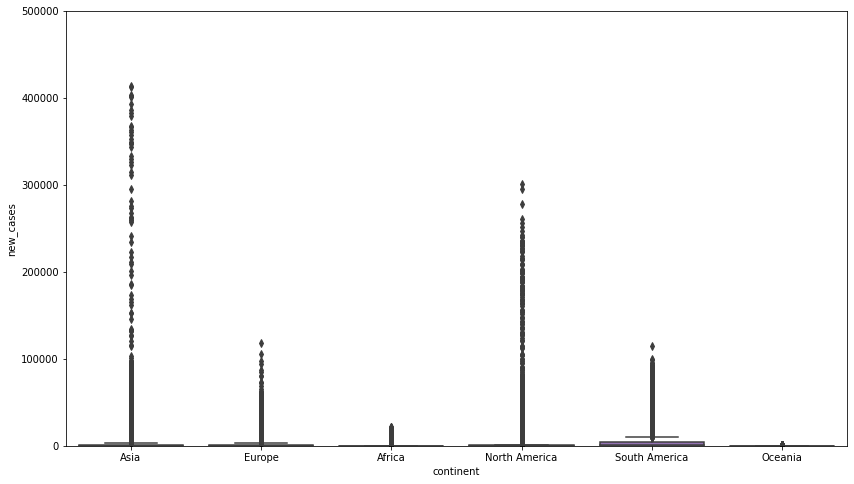

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

var = 'continent'
data = pd.concat([df['new_cases'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(14, 8))
fig = sns.boxplot(x=var, y="new_cases", data=data)
fig.axis(ymin=0, ymax=500000);

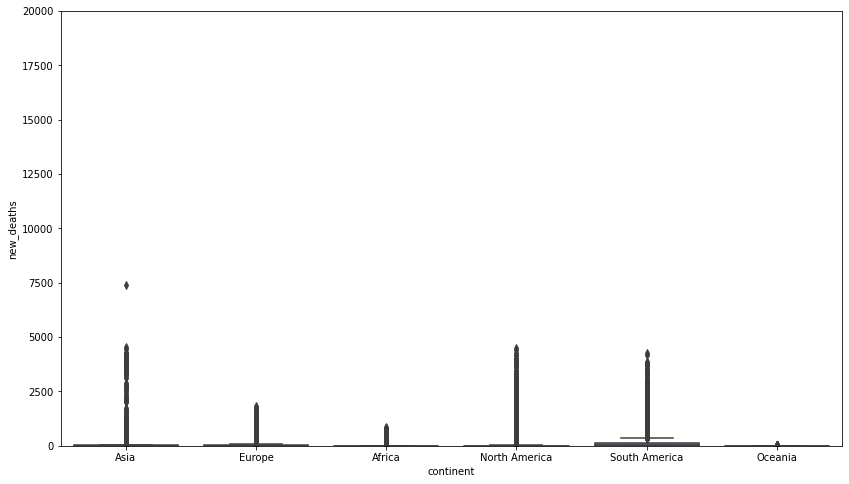

In [21]:
var = 'continent'
data = pd.concat([df['new_deaths'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(14, 8))
fig = sns.boxplot(x=var, y="new_deaths", data=data)
fig.axis(ymin=0, ymax=20000);

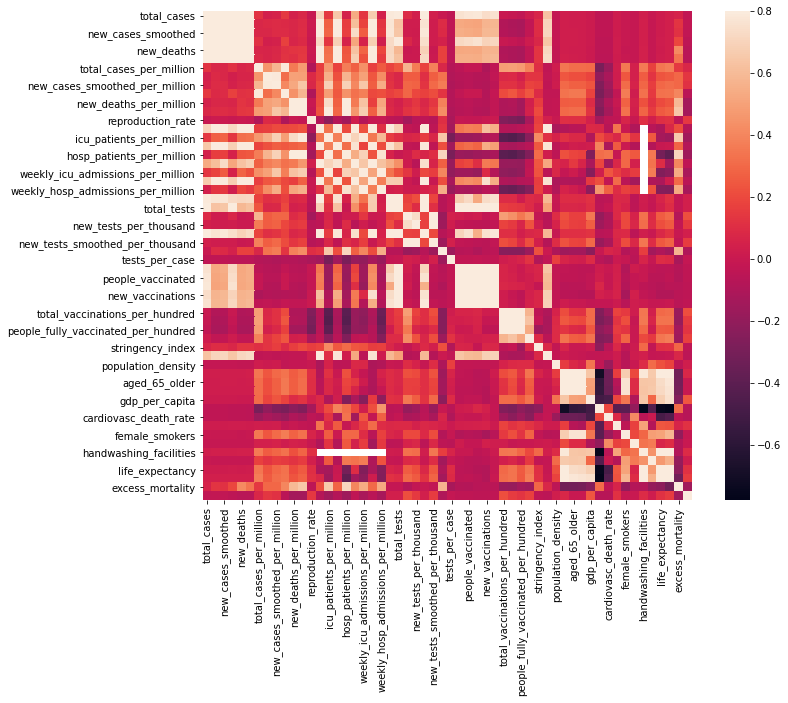

In [22]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

Countries

In [23]:
country = "United Kingdom"

include_uk = df[df['location'].values == country]
exclude_uk = df[df['location'].values != country]
uk_cov19 = include_uk
uk_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality,date_num,per_death_to_case
92967,GBR,Europe,United Kingdom,2020-01-31,2.0,2.0,NaN,NaN,NaN,NaN,0.029,0.029,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932,NaN,31012020,NaN
92968,GBR,Europe,United Kingdom,2020-02-01,2.0,0.0,NaN,NaN,NaN,NaN,0.029,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932,NaN,01022020,NaN
92969,GBR,Europe,United Kingdom,2020-02-02,2.0,0.0,NaN,NaN,NaN,NaN,0.029,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932,-5.15,02022020,NaN
92970,GBR,Europe,United Kingdom,2020-02-03,8.0,6.0,NaN,NaN,NaN,NaN,0.118,0.088,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932,NaN,03022020,NaN
92971,GBR,Europe,United Kingdom,2020-02-04,8.0,0.0,NaN,NaN,NaN,NaN,0.118,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932,NaN,04022020,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93476,GBR,Europe,United Kingdom,2021-06-23,4683986.0,15943.0,11168.714,128291.0,19.0,14.429,68997.816,234.850,164.522,1889.800,0.280,0.213,NaN,246.0,3.624,1486.0,21.89,NaN,NaN,NaN,NaN,1150834.0,201822459.0,2972.961,16.952,1011931.0,14.906,0.011,90.6,tests performed,75564430.0,43656327.0,31908103.0,375635.0,381796.0,111.31,64.31,47.00,5624.0,51.39,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932,NaN,23062021,839.105263
93477,GBR,Europe,United Kingdom,2021-06-24,4700691.0,16705.0,12009.000,128312.0,21.0,14.714,69243.890,246.074,176.899,1890.110,0.309,0.217,NaN,259.0,3.815,1505.0,22.17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75963777.0,43877861.0,32085916.0,399347.0,372097.0,111.90,64.63,47.26,5481.0,51.39,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932,NaN,24062021,795.476190
93478,GBR,Europe,United Kingdom,2021-0

In [24]:
country = "South Africa"

include_sa = df[df['location'].values == country]
exclude_sa = df[df['location'].values != country]
sa_cov19 = include_sa
sa_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality,date_num,per_death_to_case
81505,ZAF,Africa,South Africa,2020-02-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.0,0.001,NaN,NaN,NaN,NaN,NaN,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.78,59308690.0,46.754,27.3,5.344,3.053,12294.876,18.9,200.38,5.52,8.1,33.2,43.993,2.32,64.13,0.709,NaN,07022020,NaN
81506,ZAF,Africa,South Africa,2020-02-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.78,59308690.0,46.754,27.3,5.344,3.053,12294.876,18.9,200.38,5.52,8.1,33.2,43.993,2.32,64.13,0.709,NaN,08022020,NaN
81507,ZAF,Africa,South Africa,2020-02-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.78,59308690.0,46.754,27.3,5.344,3.053,12294.876,18.9,200.38,5.52,8.1,33.2,43.993,2.32,64.13,0.709,NaN,09022020,NaN
81508,ZAF,Africa,South Africa,2020-02-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.78,59308690.0,46.754,27.3,5.344,3.053,12294.876,18.9,200.38,5.52,8.1,33.2,43.993,2.32,64.13,0.709,NaN,10022020,NaN
81509,ZAF,Africa,South Africa,2020-02-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61.0,0.001,NaN,NaN,NaN,NaN,NaN,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.78,59308690.0,46.754,27.3,5.344,3.053,12294.876,18.9,200.38,5.52,8.1,33.2,43.993,2.32,64.13,0.709,NaN,11022020,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82007,ZAF,Africa,South Africa,2021-06-23,1861065.0,17493.0,12393.286,59258.0,166.0,147.857,31379.297,294.948,208.962,999.145,2.799,2.493,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70186.0,12703421.0,214.192,1.183,53083.0,0.895,0.233,4.3,people tested,NaN,NaN,NaN,NaN,67021.0,NaN,NaN,NaN,1130.0,NaN,59308690.0,46.754,27.3,5.344,3.053,12294.876,18.9,200.38,5.52,8.1,33.2,43.993,2.32,64.13,0.709,NaN,23062021,105.379518
82008,ZAF,Africa,South Africa,2021-06-24,1877143.0,16078.0,13009.143,59406.0,148.0,154.714,31650.387,271.090,219.346,1001.641,2.495,2.609,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65631.0,12769052.0,215.298,1.107,55014.0,0.928,0.236,4.2,people tested,2550248.0,2550248.0,479770.0,NaN,68700.0,4.30,4.30,0.81,1158.0,NaN,59308690.0,46.754,27.3,5.344,3.053,12294.876,18.9,200.38,5.52,8.1,33.2,43.993,2.32,64.13,0.709,NaN,24062021,108.635135
82009,ZAF,Africa,South Africa,2021-06-25,1895905.0,18762.0,14188.000,5962

UK

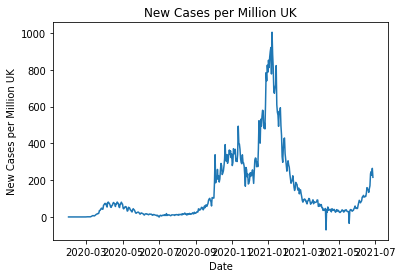

In [25]:
plt.plot(uk_cov19.date, uk_cov19.new_cases_per_million)
plt.xlabel('Date')
plt.ylabel('New Cases per Million UK')
plt.title('New Cases per Million UK')
plt.show()

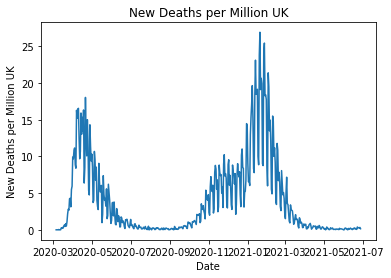

In [26]:
plt.plot(uk_cov19.date, uk_cov19.new_deaths_per_million)
plt.xlabel('Date')
plt.ylabel('New Deaths per Million UK')
plt.title('New Deaths per Million UK')
plt.show()

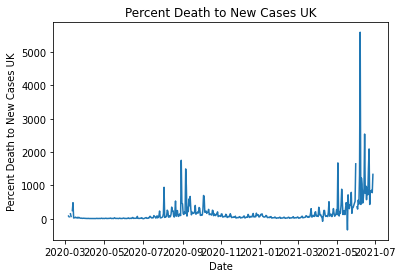

In [27]:
plt.plot(uk_cov19.date, uk_cov19.per_death_to_case)
plt.xlabel('Date')
plt.ylabel('Percent Death to New Cases UK')
plt.title('Percent Death to New Cases UK')
plt.show()

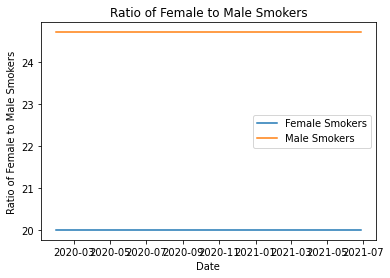

In [28]:
plt.plot(uk_cov19.date, uk_cov19.female_smokers)
plt.plot(uk_cov19.date, uk_cov19.male_smokers)
plt.legend(['Female Smokers', 'Male Smokers'])
plt.xlabel('Date')
plt.ylabel('Ratio of Female to Male Smokers')
plt.title('Ratio of Female to Male Smokers')
plt.show()

South Africa

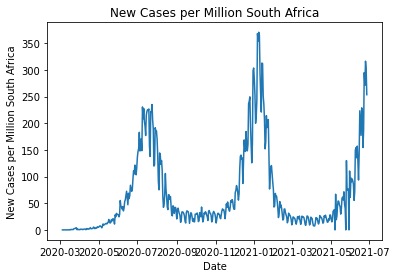

In [29]:
plt.plot(sa_cov19.date, sa_cov19.new_cases_per_million)
plt.xlabel('Date')
plt.ylabel('New Cases per Million South Africa')
plt.title('New Cases per Million South Africa')
plt.show()

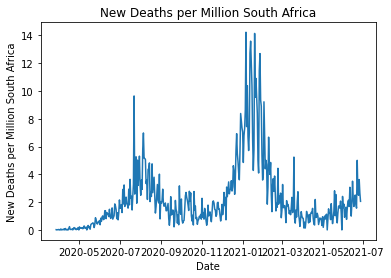

In [30]:
plt.plot(sa_cov19.date, sa_cov19.new_deaths_per_million)
plt.xlabel('Date')
plt.ylabel('New Deaths per Million South Africa')
plt.title('New Deaths per Million South Africa')
plt.show()

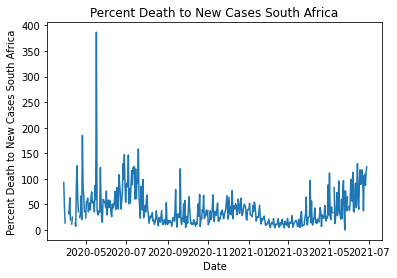

In [31]:
plt.plot(sa_cov19.date, sa_cov19.per_death_to_case)
plt.xlabel('Date')
plt.ylabel('Percent Death to New Cases South Africa')
plt.title('Percent Death to New Cases South Africa')
plt.show()

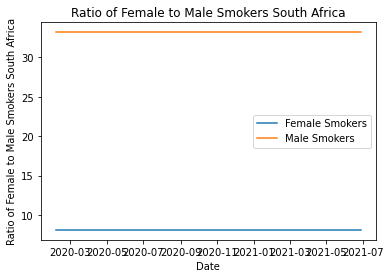

In [32]:
plt.plot(sa_cov19.date, sa_cov19.female_smokers)
plt.plot(sa_cov19.date, sa_cov19.male_smokers)
plt.legend(['Female Smokers', 'Male Smokers'])
plt.xlabel('Date')
plt.ylabel('Ratio of Female to Male Smokers South Africa')
plt.title('Ratio of Female to Male Smokers South Africa')
plt.show()

Comparisons

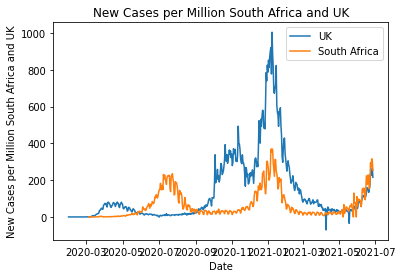

In [33]:
plt.plot(uk_cov19.date, uk_cov19.new_cases_per_million)
plt.plot(sa_cov19.date, sa_cov19.new_cases_per_million)
plt.legend(['UK', 'South Africa'])
plt.xlabel('Date')
plt.ylabel('New Cases per Million South Africa and UK')
plt.title('New Cases per Million South Africa and UK')
plt.show()

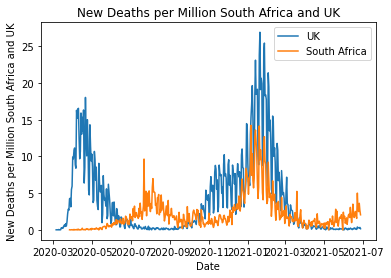

In [34]:
plt.plot(uk_cov19.date, uk_cov19.new_deaths_per_million)
plt.plot(sa_cov19.date, sa_cov19.new_deaths_per_million)
plt.legend(['UK', 'South Africa'])
plt.xlabel('Date')
plt.ylabel('New Deaths per Million South Africa and UK')
plt.title('New Deaths per Million South Africa and UK')
plt.show()

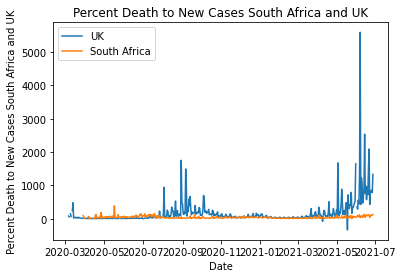

In [35]:
plt.plot(uk_cov19.date, uk_cov19.per_death_to_case)
plt.plot(sa_cov19.date, sa_cov19.per_death_to_case)
plt.legend(['UK', 'South Africa'])
plt.xlabel('Date')
plt.ylabel('Percent Death to New Cases South Africa and UK')
plt.title('Percent Death to New Cases South Africa and UK')
plt.show()

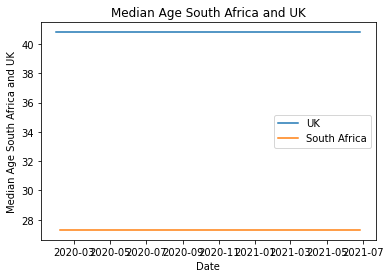

In [36]:
plt.plot(uk_cov19.date, uk_cov19.median_age)
plt.plot(sa_cov19.date, sa_cov19.median_age)
plt.legend(['UK', 'South Africa'])
plt.xlabel('Date')
plt.ylabel('Median Age South Africa and UK')
plt.title('Median Age South Africa and UK')
plt.show()

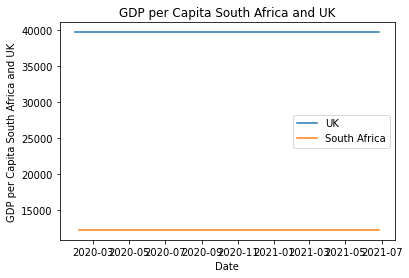

In [37]:
plt.plot(uk_cov19.date, uk_cov19.gdp_per_capita)
plt.plot(sa_cov19.date, sa_cov19.gdp_per_capita)
plt.legend(['UK', 'South Africa'])
plt.xlabel('Date')
plt.ylabel('GDP per Capita South Africa and UK')
plt.title('GDP per Capita South Africa and UK')
plt.show()

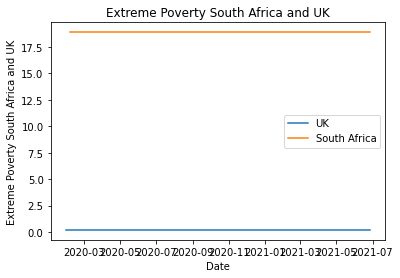

In [38]:
plt.plot(uk_cov19.date, uk_cov19.extreme_poverty)
plt.plot(sa_cov19.date, sa_cov19.extreme_poverty)
plt.legend(['UK', 'South Africa'])
plt.xlabel('Date')
plt.ylabel('Extreme Poverty South Africa and UK')
plt.title('Extreme Poverty South Africa and UK')
plt.show()

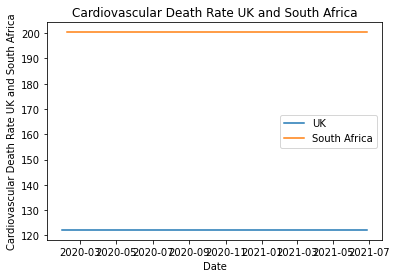

In [39]:
plt.plot(uk_cov19.date, uk_cov19.cardiovasc_death_rate)
plt.plot(sa_cov19.date, sa_cov19.cardiovasc_death_rate)
plt.legend(['UK', 'South Africa'])
plt.xlabel('Date')
plt.ylabel('Cardiovascular Death Rate UK and South Africa')
plt.title('Cardiovascular Death Rate UK and South Africa')
plt.show()

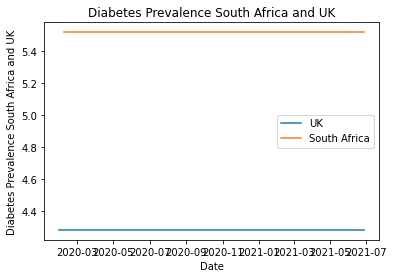

In [40]:
plt.plot(uk_cov19.date, uk_cov19.diabetes_prevalence)
plt.plot(sa_cov19.date, sa_cov19.diabetes_prevalence)
plt.legend(['UK', 'South Africa'])
plt.xlabel('Date')
plt.ylabel('Diabetes Prevalence South Africa and UK')
plt.title('Diabetes Prevalence South Africa and UK')
plt.show()

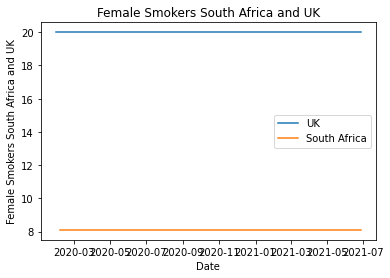

In [41]:
plt.plot(uk_cov19.date, uk_cov19.female_smokers)
plt.plot(sa_cov19.date, sa_cov19.female_smokers)
plt.legend(['UK', 'South Africa'])
plt.xlabel('Date')
plt.ylabel('Female Smokers South Africa and UK')
plt.title('Female Smokers South Africa and UK')
plt.show()

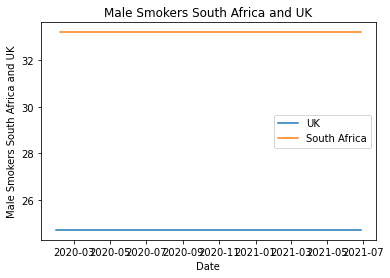

In [42]:
plt.plot(uk_cov19.date, uk_cov19.male_smokers)
plt.plot(sa_cov19.date, sa_cov19.male_smokers)
plt.legend(['UK', 'South Africa'])
plt.xlabel('Date')
plt.ylabel('Male Smokers South Africa and UK')
plt.title('Male Smokers South Africa and UK')
plt.show()

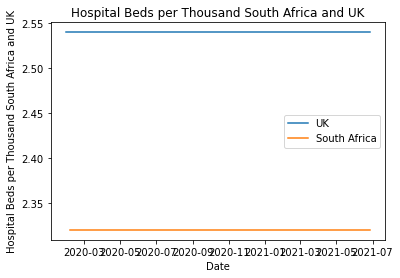

In [43]:
plt.plot(uk_cov19.date, uk_cov19.hospital_beds_per_thousand)
plt.plot(sa_cov19.date, sa_cov19.hospital_beds_per_thousand)
plt.legend(['UK', 'South Africa'])
plt.xlabel('Date')
plt.ylabel('Hospital Beds per Thousand South Africa and UK')
plt.title('Hospital Beds per Thousand South Africa and UK')
plt.show()

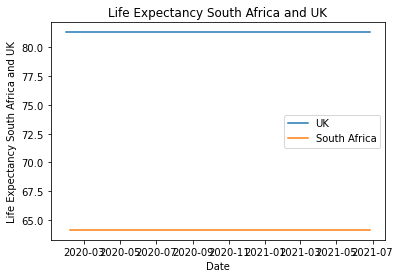

In [44]:
plt.plot(uk_cov19.date, uk_cov19.life_expectancy)
plt.plot(sa_cov19.date, sa_cov19.life_expectancy)
plt.legend(['UK', 'South Africa'])
plt.xlabel('Date')
plt.ylabel('Life Expectancy South Africa and UK')
plt.title('Life Expectancy South Africa and UK')
plt.show()

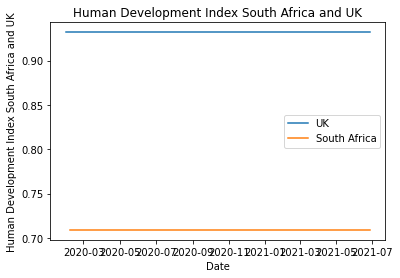

In [45]:
plt.plot(uk_cov19.date, uk_cov19.human_development_index)
plt.plot(sa_cov19.date, sa_cov19.human_development_index)
plt.legend(['UK', 'South Africa'])
plt.xlabel('Date')
plt.ylabel('Human Development Index South Africa and UK')
plt.title('Human Development Index South Africa and UK')
plt.show()